In [3]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np


In [4]:
response = requests.get("https://a.espncdn.com/i/teamlogos/nfl/500/wsh.png")
img = Image.open(BytesIO(response.content))

print(np.shape(img))

(500, 500, 4)


In [3]:
img.show()

In [4]:
team_desc[team_desc['team_abbr'] == team_abbr]['team_logo_wikipedia'].to_list()[0]

NameError: name 'team_desc' is not defined

IndexError: list index out of range

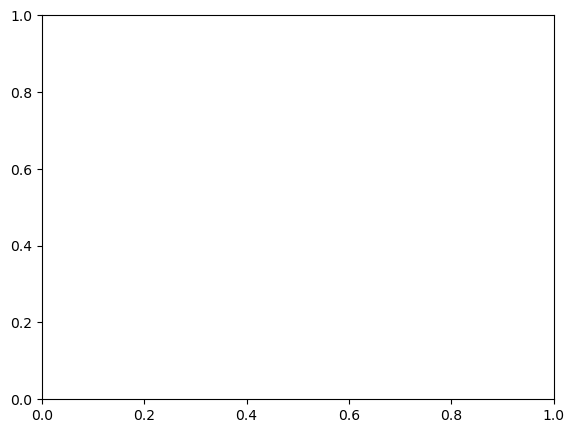

In [6]:

import matplotlib.pyplot as plt
import numpy as np
import nfl_data_py as nfl
from PIL import Image as pil_image
import requests
from io import BytesIO

team_desc = nfl.import_team_desc()


ax = plt.figure().add_axes([.15,.15,.8,.8])
x = 10
y = 10
s = 10
team_abbr = ''
#def logo_scatter_indiv(ax,x,y,s,team_abbr = None,team_id= None):
if True:
    if team_abbr is not None:


        team_logo_url = team_desc[team_desc['team_abbr'] == team_abbr]['team_logo_wikipedia'].to_list()[0]

    elif team_id is not None:


        team_logo_url = team_desc[team_desc['team_id'] == team_id]['team_logo_wikipedia'].to_list()[0]
    else:
        raise ValueError("No Team Identifier")


#    s_scale = ax.asp
    im_ax =ax.inset_axes([x-s/2,y-s/2,s,s], transform=ax.transData)#, bbox_to_anchor=[0.5, 0.5], loc='center')
    

    response = requests.get(team_logo_url)
    img = pil_image.open(BytesIO(response.content)) 
    im_ax.imshow(img)


    im_ax.set_aspect('equal')
    #return(ax)

ax.set_xlim([0,20])
ax.set_ylim([0,100])
if False:
#def logo_scatter(ax,x,y,s,team_abbrs=None,team_ids=None):

    data_points = np.size(x)[0]

    if np.size(x)[0] != np.size(y)[0]:
        raise ValueError("Size Mismatch")
    elif np.size(x)[0] != np.size(y)[0]:
        raise ValueError("Size Mismatch")

    if np.size(s) == 1:
        s = np.ones(data_points)*s

    for i in range(data_points):
        if team_abbrs is not None:
           _ = logo_scatter_indiv(ax,x[i],y[i],s[i],team_abbr = team_abbrs[i])
        elif team_ids is not None:
           _ = logo_scatter_indiv(ax,x[i],y[i],s[i],team_id = team_ids[i])
        else:
            raise ValueError("No Team Identifier")
    
    #
    # return ax

In [8]:
team_desc2 = nfl.import_team_desc()
team_desc2['loaded_logos'] = [[] for x in range(len(team_desc2))]   
for i in range(len(team_desc2)):
    curr_im = team_desc2.loc[i,'team_logo_espn']
    loaded_im = np.asarray(pil_image.open(BytesIO(requests.get(curr_im).content)))
    team_desc2.loc[i,'loaded_logos'] = [loaded_im]


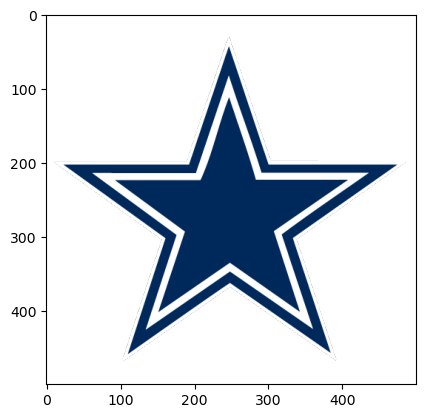

In [ ]:
plt.figure()
plt.imshow(team_desc2.loc[8,'loaded_logos'][0])
plt.show()

print(np.shape(team_desc2.loc[8,'loaded_logos'][0]))


In [10]:
print(team_desc2['team_abbr'])


0     ARI
1     ATL
2     BAL
3     BUF
4     CAR
5     CHI
6     CIN
7     CLE
8     DAL
9     DEN
10    DET
11     GB
12    HOU
13    IND
14    JAX
15     KC
16     LA
17    LAC
18    LAR
19     LV
20    MIA
21    MIN
22     NE
23     NO
24    NYG
25    NYJ
26    OAK
27    PHI
28    PIT
29     SD
30    SEA
31     SF
32    STL
33     TB
34    TEN
35    WAS
Name: team_abbr, dtype: object


In [ ]:
team_abbr = 'PHI'
img = team_desc2[team_desc2['team_abbr'] == team_abbr]#['loaded_logos'][0]

KeyError: 'loaded_logos'